In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


<Axes: ylabel='count'>

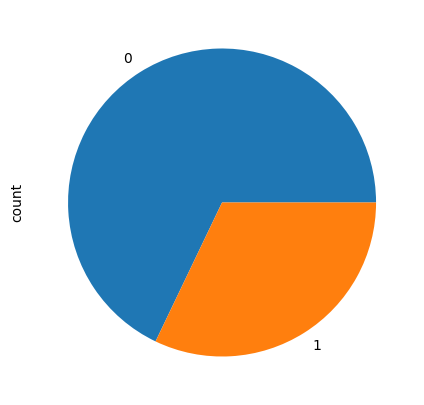

In [11]:
df['DEATH_EVENT'].value_counts().plot(kind='pie',figsize=(10,5))

In [12]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[ 1.16420244,  1.13933179, -0.35037003, ...,  0.74293206,
        -0.67625223, -1.56416577],
       [ 1.16420244, -0.87770745, -0.50593309, ...,  0.74293206,
        -0.67625223,  0.37989712],
       [-0.03281933,  1.13933179, -0.50064183, ...,  0.74293206,
        -0.67625223,  0.4950061 ],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ...,  0.74293206,
        -0.67625223, -0.56655455],
       [-1.42476533, -0.87770745,  0.0052027 , ...,  0.74293206,
         1.4787382 ,  1.42866789],
       [ 1.58177789, -0.87770745,  0.33961039, ...,  0.74293206,
         1.4787382 , -0.57934444]])

In [16]:
X_test

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
        -8.26497787e-01,  1.49345268e-01, -7.36162675e-01,
        -2.24743345e+00,  1.32203359e+00, -9.44310219e-02,
         7.42932064e-01,  1.47873820e+00,  1.50540721e+00],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -8.26497787e-01, -2.80697130e-01, -7.36162675e-01,
         1.05843720e+00, -4.90853221e-01,  8.08329548e-01,
         7.42932064e-01,  1.47873820e+00,  1.37750834e+00],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
         1.20992460e+00, -7.10739527e-01, -7.36162675e-01,
         7.60802546e-01, -2.89421353e-01,  5.82639405e-01,
         7.42932064e-01, -6.76252226e-01, -4.21691686e-02],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -8.26497787e-01, -2.80697130e-01,  1.35839541e+00,
         1.33481224e+00,  8.07000115e+00, -7.71501449e-01,
         7.42932064e-01,  1.47873820e+00, -1.56416577e+00],
       [-1.59179551e+00, -8.77707451e-01, -5.0275833

In [18]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weights = dict(zip(classes, weights))
print("Class weights:", class_weights)


Class weights: {np.int64(0): np.float64(0.7113095238095238), np.int64(1): np.float64(1.6830985915492958)}


In [19]:
from tensorflow.keras import layers, models, callbacks

In [22]:
n_features = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")          # ← binary output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.AUC(name="AUC"), "accuracy"]
)

early_stop = callbacks.EarlyStopping(
    patience=10, restore_best_weights=True, monitor="val_AUC", mode="max"
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

test_metrics = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_metrics[0]:.4f} | Test AUC: {test_metrics[1]:.4f} | Test accuracy: {test_metrics[2]:.4f}")


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - AUC: 0.4495 - accuracy: 0.5534 - loss: 0.7746 - val_AUC: 0.5498 - val_accuracy: 0.4792 - val_loss: 0.6713
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5784 - accuracy: 0.6266 - loss: 0.7081 - val_AUC: 0.6019 - val_accuracy: 0.4792 - val_loss: 0.6692
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5258 - accuracy: 0.5357 - loss: 0.7178 - val_AUC: 0.6574 - val_accuracy: 0.4792 - val_loss: 0.6647
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.7172 - accuracy: 0.6783 - loss: 0.6551 - val_AUC: 0.6840 - val_accuracy: 0.5000 - val_loss: 0.6614
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.7207 - accuracy: 0.6317 - loss: 0.6194 - val_AUC: 0.7014 - val_accuracy: 0.5000 - val_loss: 0.6568
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.7594 - accuracy: 0.6277 - loss: 0.6067 - val_AUC: 0.7141 - val_accuracy: 0.5417 - val_loss: 0.6495
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - 